## Do I have a spending problem?
#### An anlysis of my spending habits over the last two years

I am trying to create a budget for myself and my future wife. I will be analysis my spending over the last 2 years to do so. I only use credit cards. I do not pay cash, with checks or use a debit card for any transactions. Because of this, I am able to download Excel spreadsheets from my bank's website with every transaction I have made over the last two years. The only thing that is missing from my spending over the last two years are any purchases that were made by a friend that I paid them back for using Venmo such as an AirBnB that my friends and I split this past summer.

The last few months worth of data is skewed because I am getting married in Mexico and have been buying flights and hotel rooms for multiple people outside of myself and my future wife. Since this spending is abnormal and will not factor into my budgeting in the future, I will be removing any wedding related purchases from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "Transactions/"

sapphire_df = pd.read_csv(filepath + "Sapphire.csv")
freedom_df = pd.read_csv(filepath + "Freedom.csv")
freedom_unlimited_df = pd.read_csv(filepath + "FreedomUnlimited.csv")
amazon_prime_df = pd.read_csv(filepath + "Amazon.csv")

sapphire_df.head()
sapphire_df.info()
sapphire_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  197 non-null    object 
 1   Post Date         197 non-null    object 
 2   Description       197 non-null    object 
 3   Category          179 non-null    object 
 4   Type              197 non-null    object 
 5   Amount            197 non-null    float64
 6   Memo              0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 10.9+ KB


,Amount,Memo
count,197.000000,0.0
mean,-0.395736,NaN
std,275.454296,NaN
min,-1050.000000,NaN
25%,-41.930000,NaN
50%,-22.990000,NaN
75%,-11.210000,NaN
max,1504.380000,NaN


In [3]:
#helper function to clean the four dataframes
# 1. The memo field is null for almost every transaction - we won't need it
# 2. I do not need a transaction date AND a post date, I will only keep the transaction date
# 3. The Amount field is negative for all purchases, so I decided to make them all positive
# 4. The Category field is NaN when I paid off the card, I am not interested in how often I paid off the card, only what was spent. 
    #I will remove all Nan rows

def cleanDF(df):
    if 'Memo' in df and 'Post Date' in df:
        df.drop(['Memo', 'Post Date'], axis=1, inplace=True)
    df.dropna(inplace=True)
    df['Amount'] = -df['Amount']
    return df
    

In [4]:
sapphire = cleanDF(sapphire_df)
freedom = cleanDF(freedom_df)
freedom_unlimited = cleanDF(freedom_unlimited_df)
amazon_prime = cleanDF(amazon_prime_df)


In [5]:
sapphire.head()

,Transaction Date,Description,Category,Type,Amount
0,12/29/2024,WALLYPARK-DENVER,Travel,Sale,59.05
1,12/27/2024,SOUTHWES 5262592923374,Travel,Sale,395.92
2,12/27/2024,FRONTIER AI YD5WQC,Travel,Sale,144.00
3,12/24/2024,TACO BELL 032400,Food & Drink,Sale,5.07
4,12/24/2024,TEXAS ROADHOUSE #2170,Food & Drink,Sale,50.87


In [6]:
value_counts_sap = sapphire['Category'].value_counts()
value_counts_free = freedom['Category'].value_counts()
value_counts_freeu = freedom_unlimited['Category'].value_counts()
value_counts_prime = amazon_prime['Category'].value_counts()

value_counts_sap


Category
Food & Drink             115
Travel                    33
Groceries                 11
Fees & Adjustments         5
Shopping                   5
Education                  4
Gas                        2
Bills & Utilities          1
Professional Services      1
Health & Wellness          1
Home                       1
Name: count, dtype: int64

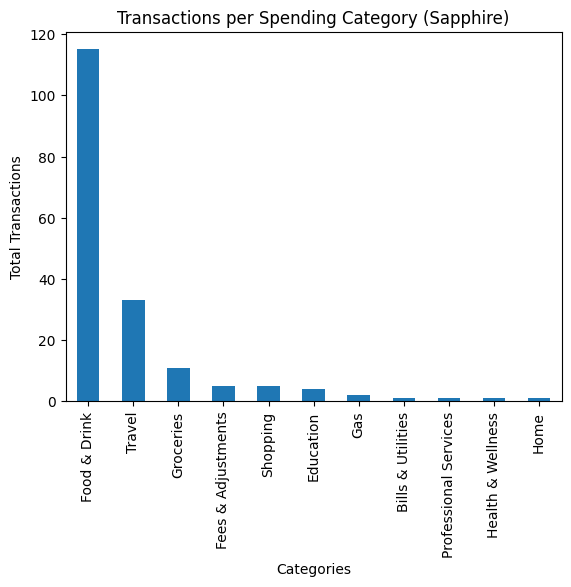

In [7]:
value_counts_sap.plot(kind='bar')
plt.title('Transactions per Spending Category (Sapphire)')
plt.xlabel('Categories')
plt.ylabel('Total Transactions')
plt.show()

The sapphire card is a travel card that I mainly use for food (dining out and doordash) and travel thus it makes sense that those are the two categories with the majority of the transactions.

In [8]:
#merge the four cards into one df
all_spending = [freedom, freedom_unlimited, sapphire, amazon_prime]
all_spending = pd.concat(all_spending)
all_spending.dropna(inplace=True)

In [9]:
all_spending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 1 to 219
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  992 non-null    object 
 1   Description       992 non-null    object 
 2   Category          992 non-null    object 
 3   Type              992 non-null    object 
 4   Amount            992 non-null    float64
dtypes: float64(1), object(4)
memory usage: 46.5+ KB


In [10]:
all_spending.head()


,Transaction Date,Description,Category,Type,Amount
1,02/14/2025,PlayStation Network,Entertainment,Sale,5.33
3,02/12/2025,PLAYSTATION NETWORK,Shopping,Sale,10.68
4,02/07/2025,SAFEWAY #0899,Groceries,Sale,18.08
5,02/06/2025,THE HOME DEPOT #1528,Home,Sale,11.85
6,02/06/2025,THE HOME DEPOT #1528,Home,Sale,19.80


In [11]:
value_counts_all = all_spending['Category'].value_counts()
value_counts_all

Category
Shopping                 296
Groceries                216
Food & Drink             140
Bills & Utilities         77
Home                      66
Entertainment             55
Travel                    36
Gas                       27
Education                 26
Automotive                17
Personal                  15
Health & Wellness          7
Professional Services      6
Fees & Adjustments         5
Gifts & Donations          3
Name: count, dtype: int64

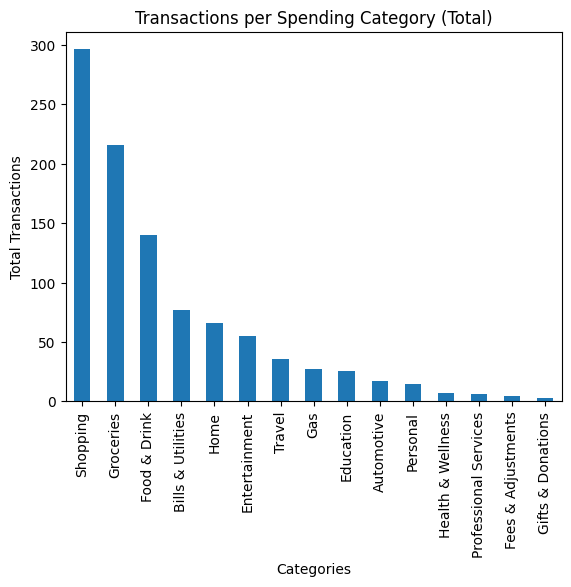

In [12]:
value_counts_all.plot(kind='bar')
plt.title('Transactions per Spending Category (Total)')
plt.xlabel('Categories')
plt.ylabel('Total Transactions')
plt.show()

In [13]:
total_spend = sum(all_spending['Amount'])

In [14]:
print("I spent: $", total_spend, "over the last two years")

I spent: $ 74211.02 over the last two years


In [15]:
total_spend_by_category = all_spending.groupby('Category')['Amount'].sum()

In [16]:
total_spend_by_category

Category
Automotive                 623.19
Bills & Utilities         6961.31
Education                12040.89
Entertainment             3912.77
Fees & Adjustments         150.00
Food & Drink              4096.49
Gas                        792.74
Gifts & Donations          260.70
Groceries                 5363.07
Health & Wellness         3270.00
Home                      7808.85
Personal                  3312.62
Professional Services     4865.64
Shopping                 16350.26
Travel                    4402.49
Name: Amount, dtype: float64

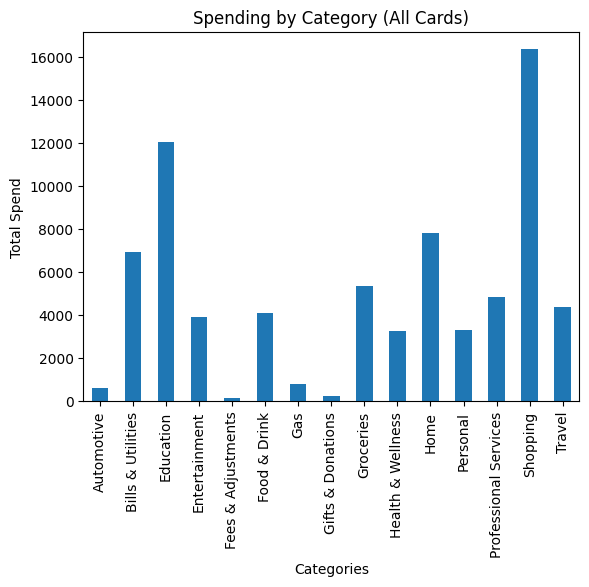

In [17]:
total_spend_by_category.plot(kind='bar')
plt.title('Spending by Category (All Cards)')
plt.xlabel('Categories')
plt.ylabel('Total Spend')
plt.show()

In [18]:
amazon_prime.head()

,Transaction Date,Description,Category,Type,Amount
0,03/03/2025,SP COMFRT,Shopping,Sale,134.45
1,03/02/2025,AMAZON MKTPL*HF86X09O3,Shopping,Sale,32.68
2,02/28/2025,Prime Video Channels,Shopping,Sale,16.00
3,02/21/2025,Amazon.com*M14XT0N83,Shopping,Sale,97.11
4,02/20/2025,AMAZON MKTPL*Y473S25P3,Shopping,Sale,21.88


In [19]:
value_counts_prime = amazon_prime['Category'].value_counts()
value_counts_prime

Category
Shopping             182
Bills & Utilities      2
Name: count, dtype: int64

### The data is skewed

Everything purchased on the amazon prime card (except for the yearly membership fee) is categorized as "Shopping" however, I have used that card to purchase groceries, school supplies, items for home repair, and things that should be under the entertainment category such as renting a movie. If this were for any other purpose, I would go through and evaluate which category the purchase actually belong to. However, I do not have the free-time for such a task, so I have opted to create a new category just for Amazon purchases.

In [20]:
amazon_prime['Category'] = 'Amazon'
amazon_prime.head()

,Transaction Date,Description,Category,Type,Amount
0,03/03/2025,SP COMFRT,Amazon,Sale,134.45
1,03/02/2025,AMAZON MKTPL*HF86X09O3,Amazon,Sale,32.68
2,02/28/2025,Prime Video Channels,Amazon,Sale,16.00
3,02/21/2025,Amazon.com*M14XT0N83,Amazon,Sale,97.11
4,02/20/2025,AMAZON MKTPL*Y473S25P3,Amazon,Sale,21.88


In [21]:
all_spending = [freedom, freedom_unlimited, sapphire, amazon_prime]
all_spending = pd.concat(all_spending)
all_spending.dropna(inplace=True)

In [22]:
all_spending.head()

,Transaction Date,Description,Category,Type,Amount
1,02/14/2025,PlayStation Network,Entertainment,Sale,5.33
3,02/12/2025,PLAYSTATION NETWORK,Shopping,Sale,10.68
4,02/07/2025,SAFEWAY #0899,Groceries,Sale,18.08
5,02/06/2025,THE HOME DEPOT #1528,Home,Sale,11.85
6,02/06/2025,THE HOME DEPOT #1528,Home,Sale,19.80


In [23]:
value_counts_all = all_spending['Category'].value_counts()
value_counts_all

Category
Groceries                216
Amazon                   184
Food & Drink             140
Shopping                 114
Bills & Utilities         75
Home                      66
Entertainment             55
Travel                    36
Gas                       27
Education                 26
Automotive                17
Personal                  15
Health & Wellness          7
Professional Services      6
Fees & Adjustments         5
Gifts & Donations          3
Name: count, dtype: int64

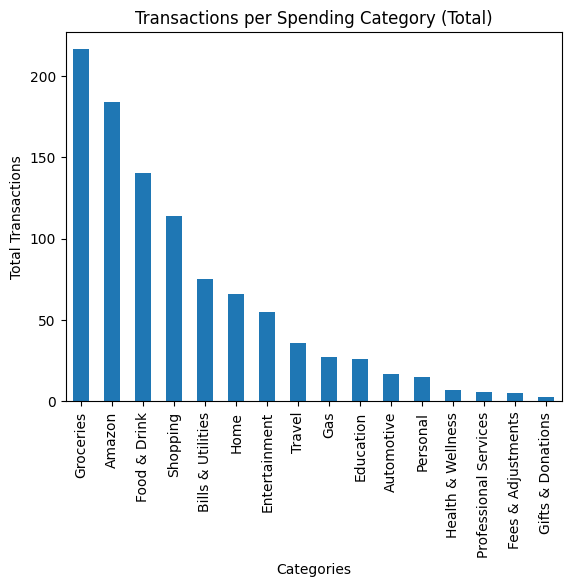

In [24]:
value_counts_all.plot(kind='bar')
plt.title('Transactions per Spending Category (Total)')
plt.xlabel('Categories')
plt.ylabel('Total Transactions')
plt.show()

In [25]:
all_spending['Transaction Date'] = pd.to_datetime(all_spending['Transaction Date'])

In [26]:
all_spending['month'] = all_spending['Transaction Date'].dt.month


In [27]:
all_spending.head()

,Transaction Date,Description,Category,Type,Amount,month
1,2025-02-14,PlayStation Network,Entertainment,Sale,5.33,2
3,2025-02-12,PLAYSTATION NETWORK,Shopping,Sale,10.68,2
4,2025-02-07,SAFEWAY #0899,Groceries,Sale,18.08,2
5,2025-02-06,THE HOME DEPOT #1528,Home,Sale,11.85,2
6,2025-02-06,THE HOME DEPOT #1528,Home,Sale,19.80,2


In [28]:
value_counts_months = all_spending['month'].value_counts()

value_counts_months

month
12    103
2     101
8      96
4      90
6      80
5      78
3      77
1      77
11     77
10     75
7      73
9      65
Name: count, dtype: int64

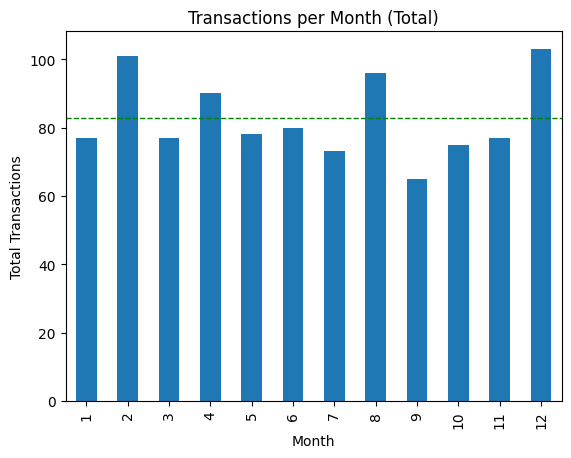

Average number of transactions per month:  82.67


In [33]:
desired_order = [1,2,3,4,5,6,7,8,9,10,11,12]
    
value_counts_months = value_counts_months.reindex(desired_order)
mean_value = round(np.mean(value_counts_months), 2)


plt.axhline(mean_value, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')


value_counts_months.plot(kind='bar')#, color=colors)
plt.title('Transactions per Month (Total)')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.show()

print("Average number of transactions per month: ", mean_value)

I made the most transactions in December and February. This makes sense as I was buying a lot of presents for neices and nephews around the holidays, and my anniversary is in February so I would have splurged on my fiancee during that time.

Exporting the all_spending dataframe to a new csv file

In [30]:
all_spending.to_csv('out.csv', index=False) 